###***Time Series Analysis and Forecasting***

In [ ]:
#Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/My Drive/Colab Notebooks/Time Series

In [ ]:
#importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
%matplotlib inline

In [ ]:
#loading the csv file
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')
df.head(6)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
5,1964-06,3036.0


In [ ]:
#publishing last few records of the DataFrame
df.tail(6)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [ ]:
#cleaning the meta data
df.columns = ['Month','Sales']
df.head(6)

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
5,1964-06,3036.0


In [ ]:
#checking if there are null values
df.isna().values.any()

True

In [ ]:
#finding out the rows of null values
df[(df['Month'].isnull())]

,Month,Sales
105,NaN,NaN


In [ ]:
#finding out the rows of null values
df[(df['Sales'].isnull())]

,Month,Sales
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [ ]:
#dropping the rows with null values
print('Initial number of rows :',df.shape[0])
df = df.dropna(axis=0)
print('Final number of rows   :',df.shape[0])

Initial number of rows : 107
Final number of rows   : 105


In [ ]:
#convert month column into Datatime format of Pandas
df['Month'] = pd.to_datetime(df['Month'])

In [ ]:
#publishing the top rows of DataFrame
df.head(6)

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
5,1964-06-01,3036.0


In [ ]:
#setting month as index
df.set_index('Month',inplace=True)
df.head(6)

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
1964-06-01,3036.0


In [ ]:
#getting an overview
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


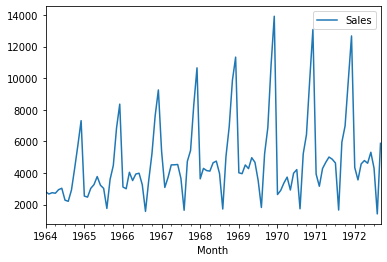

In [ ]:
#visualizing the data
df.plot()
plt.show()

In [ ]:
#testing for stationary nature of time series Data using the Dickey-fuller test
test_result = adfuller(df['Sales'])
label       = ['Test Stat','P value','Lag Used','Number of observation used']
for val,label in zip(test_result,label):
  print(label, val)

Test Stat -1.8335930563276193
P value 0.36391577166024686
Lag Used 11
Number of observation used 93


In [ ]:
#as value in greater than 0.05 we have enough evidence to accept the null hypothesis that is series is non-stationary, now doing differencing
df['Sales_with_1_diff'] = df['Sales'] - df['Sales'].shift(12)

In [ ]:
#publishing top 15 rows
df.head(15)

,Sales,Sales_with_1_diff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [ ]:
#testing for stationary nature of time series Data using the Dickey-fuller test
test_result = adfuller(df['Sales_with_1_diff'].dropna())
label       = ['Test Stat','P value','Lag Used','Number of observation used']
for val,label in zip(test_result,label):
  print(label, val)

Test Stat -7.626619157213166
P value 2.0605796968136632e-11
Lag Used 0
Number of observation used 92


[]

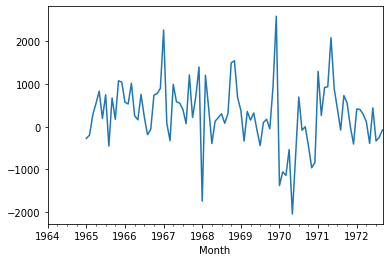

In [ ]:
#plotting the 1st difference, we used 12 because it is seasonal with periodicity of 12 months
df['Sales_with_1_diff'].plot()
plt.plot()

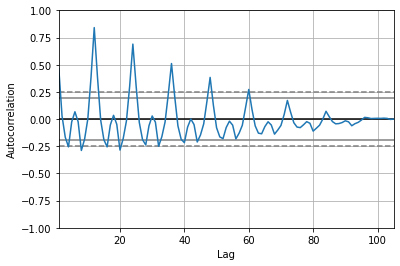

In [ ]:
#plotting the auto correlation plot
autocorrelation_plot(df['Sales'])
plt.show()

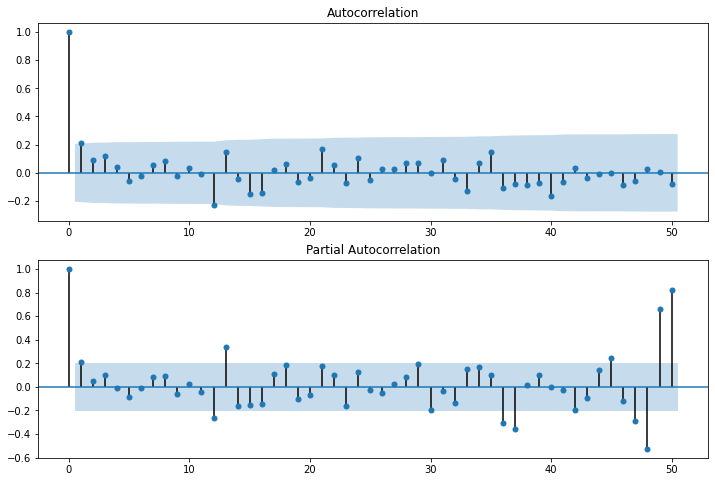

In [ ]:
#plotting the autocorrelation and partial autocorrelation
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Sales_with_1_diff'].iloc[13:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Sales_with_1_diff'].iloc[13:],lags=50,ax=ax2)

In [ ]:
#from abbe above graphs we conclude values of p, q and d as below
p = 1
q = 1
d = 1

In [ ]:
#doing modeling over the sales data now
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
#brief summary
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Wed, 02 Sep 2020   AIC                           1910.251
Time:                        11:49:07   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7846     12.405      1.837      0.069      -1.529      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

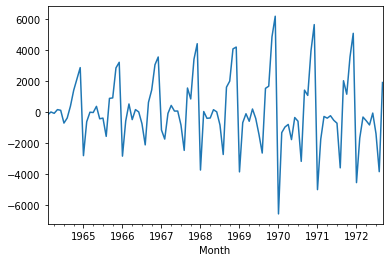

In [ ]:
#plotting the errors in the model
model_fit.resid.plot()
plt.show()

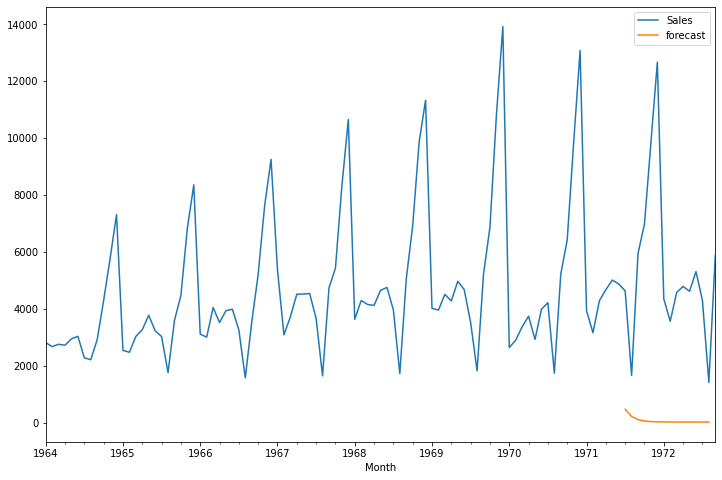

In [ ]:
#as we already saw error is there in the model, forecast won't be very good
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))
plt.show()

In [ ]:
#now using the sarimax model, that is Seasonal ARIMA
model   = sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


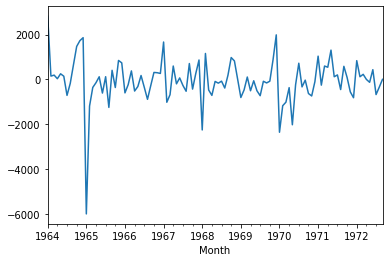

In [ ]:
#let us see the error now
results.resid.plot()
plt.show()

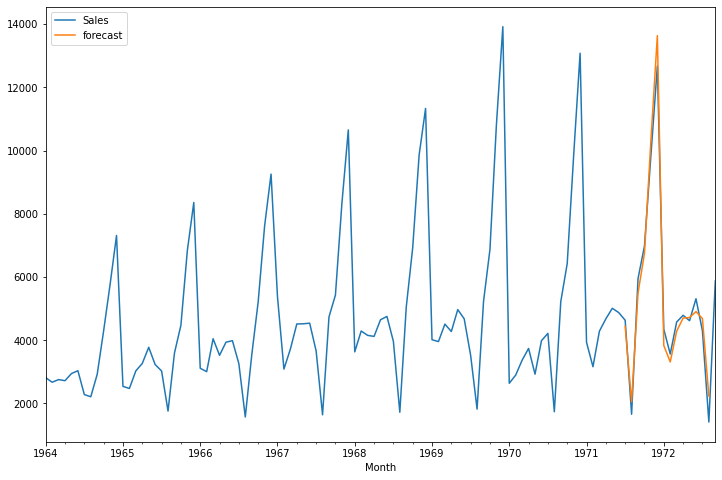

In [ ]:
#let us check on the data now
df['forecast'] = results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))
plt.show()

In [ ]:
#publishing the top rows of final df
df.head(20)

,Sales,Sales_with_1_diff,forecast
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,NaN,NaN
1964-03-01,2755.0,NaN,NaN
1964-04-01,2721.0,NaN,NaN
1964-05-01,2946.0,NaN,NaN
1964-06-01,3036.0,NaN,NaN
1964-07-01,2282.0,NaN,NaN
1964-08-01,2212.0,NaN,NaN
1964-09-01,2922.0,NaN,NaN


In [ ]:
#publishing the last rows of final df
df.tail(20)

,Sales,Sales_with_1_diff,forecast
Month,,,
1971-02-01,3162.0,263.0,NaN
1971-03-01,4286.0,916.0,NaN
1971-04-01,4676.0,936.0,NaN
1971-05-01,5010.0,2083.0,NaN
1971-06-01,4874.0,888.0,NaN
1971-07-01,4633.0,416.0,4437.324531
1971-08-01,1659.0,-79.0,2050.747550
1971-09-01,5951.0,730.0,5493.376481
1971-10-01,6981.0,557.0,6752.038992


In [ ]:
#creating extra dates for forecasting
future_dates = []
for i in range(24):
  future_dates.append(df.index[-1]+DateOffset(months=i))
future_dates[:5]

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00')]

In [ ]:
#creating an empty DataFrame
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.head(6)

,Sales,Sales_with_1_diff,forecast
1972-10-01,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN


In [ ]:
#concatinating with the main DataFrame
future_df=pd.concat([df,future_datest_df])
future_df.head(6)

,Sales,Sales_with_1_diff,forecast
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,NaN,NaN
1964-03-01,2755.0,NaN,NaN
1964-04-01,2721.0,NaN,NaN
1964-05-01,2946.0,NaN,NaN
1964-06-01,3036.0,NaN,NaN


In [ ]:
#publishing the last rows of the DataFrame
future_df.tail(6)

,Sales,Sales_with_1_diff,forecast
1974-03-01,NaN,NaN,NaN
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN


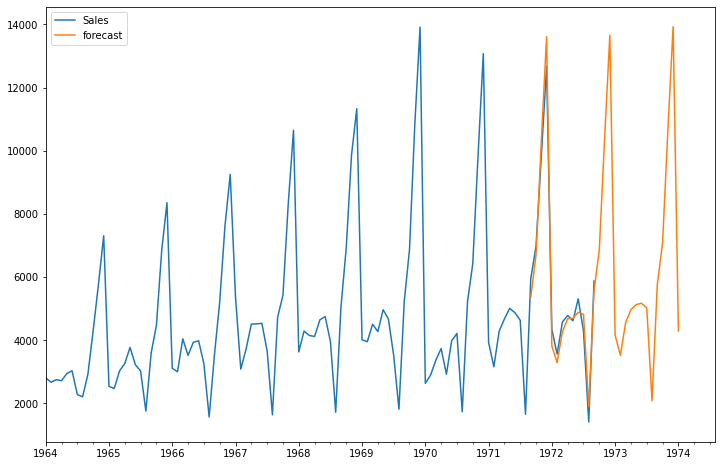

In [ ]:
#predicting the values of sales now
future_df['forecast'] = results.predict(start = 92, end = 120, dynamic=True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))
plt.show()

###***--End of Notebook--***